In [ ]:
PART-1

In [ ]:
Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the inventory -
to match the demand with respect to supply.

1.You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, 
    outlier analysis, and handle the missing values to come up with various insights 
    that can give them a clear perspective on the following:

a.  If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

b.  If the weekly sales show a seasonal trend, when and what could be the reason?

c.   Does temperature affect the weekly sales in any manner?

d.  How is the Consumer Price index affecting the weekly sales of various stores?

e.  Top performing stores according to the historical data.
    
f.   The worst performing store, and how significant is the difference between the highest and lowest performing stores.

2.  Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Walmart.csv')

In [5]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [11]:
df.tail(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [13]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [15]:
df['Store'].nunique()

45

In [13]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [15]:
df.shape

(6435, 8)

In [21]:
df['Date'].nunique()

143

In [17]:
df.index = df['Date']

In [19]:
df.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                     
05-02-2010      1  05-02-2010    1643690.90             0        42.31   
12-02-2010      1  12-02-2010    1641957.44             1        38.51   
19-02-2010      1  19-02-2010    1611968.17             0        39.93   
26-02-2010      1  26-02-2010    1409727.59             0        46.63   
05-03-2010      1  05-03-2010    1554806.68             0        46.50   

            Fuel_Price         CPI  Unemployment  
Date                                              
05-02-2010       2.572  211.096358         8.106  
12-02-2010       2.548  211.242170         8.106  
19-02-2010       2.514  211.289143         8.106  
26-02-2010       2.561  211.319643         8.106  
05-03-2010       2.625  211.350143         8.106

In [21]:
df.drop(columns = ['Date'], inplace = True)

In [23]:
df.head(5)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
05-02-2010      1    1643690.90             0        42.31       2.572   
12-02-2010      1    1641957.44             1        38.51       2.548   
19-02-2010      1    1611968.17             0        39.93       2.514   
26-02-2010      1    1409727.59             0        46.63       2.561   
05-03-2010      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
05-02-2010  211.096358         8.106  
12-02-2010  211.242170         8.106  
19-02-2010  211.289143         8.106  
26-02-2010  211.319643         8.106  
05-03-2010  211.350143         8.106

In [25]:
df.shape

(6435, 7)

In [27]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [7]:
# df.set_index('Date', inplace = True)

In [19]:
df[0:1]

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
05-02-2010      1     1643690.9             0        42.31       2.572   

                   CPI  Unemployment  
Date                                  
05-02-2010  211.096358         8.106

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2+ KB


In [ ]:
# EDA
- droping or replacing null values
- droping duplicates
- understanding statistics and correlation 
- heatmap
- outliers handling

In [33]:
df.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000

In [35]:
corr_df = df.corr()
corr_df

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000

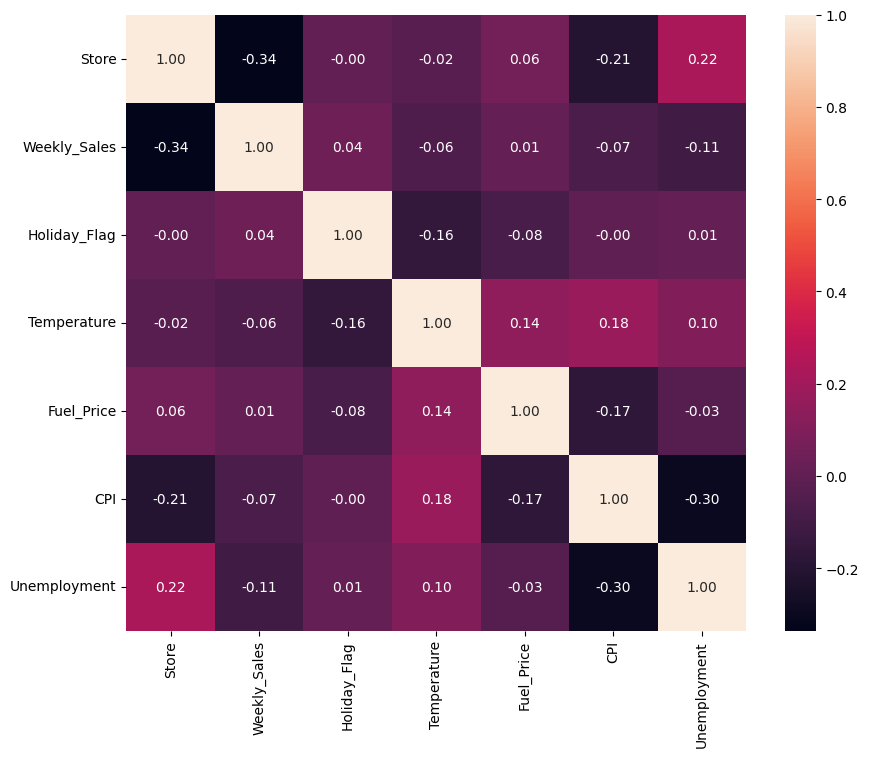

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot = True, fmt = '.2f')
plt.show()

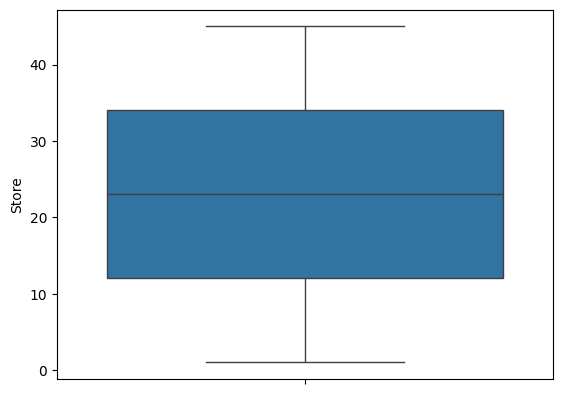

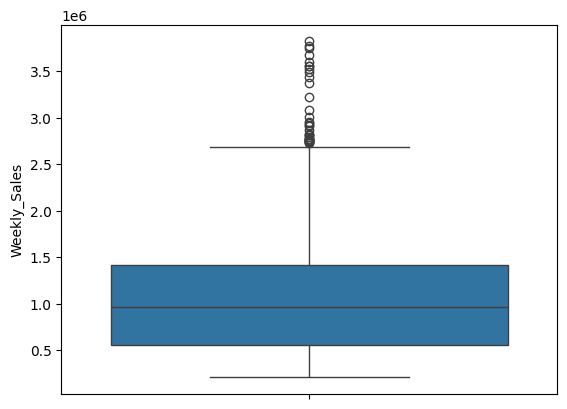

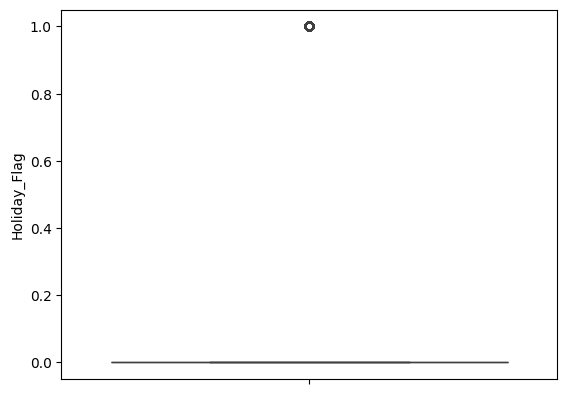

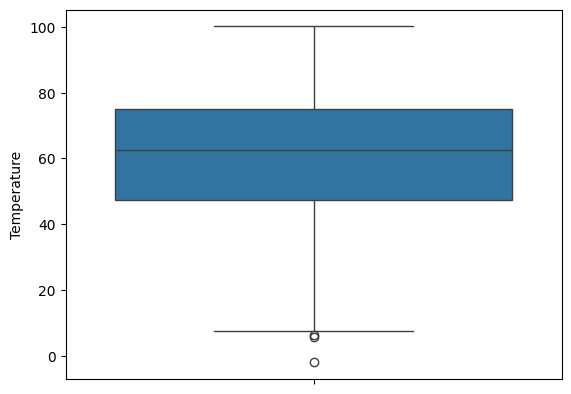

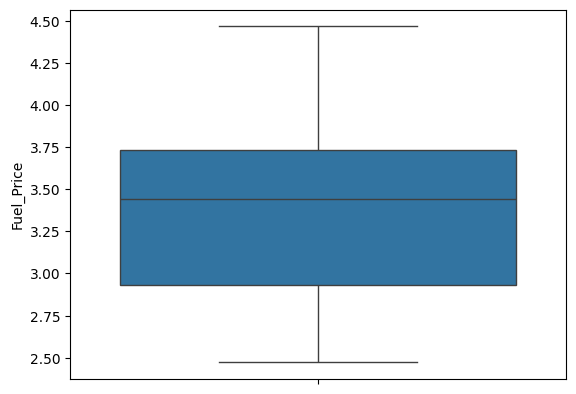

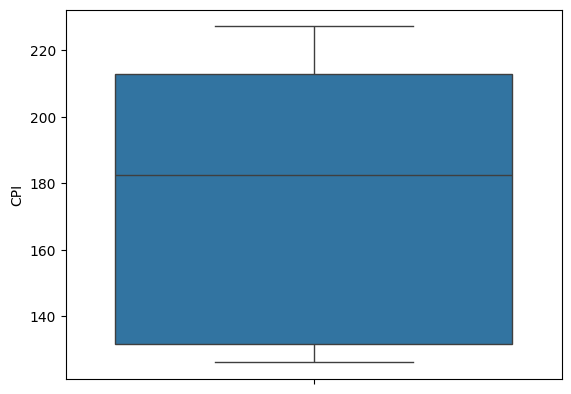

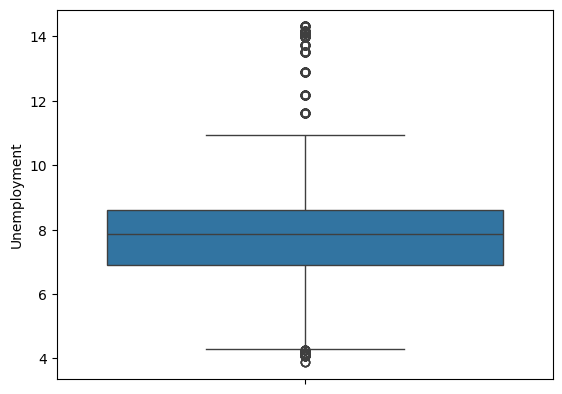

In [39]:
for col in df.columns:
    if df[col].dtypes != 'object' :
        sns.boxplot(df[col])
        plt.show()

In [41]:
Q1 = df.quantile(0.25)
Q1

Store               12.000
Weekly_Sales    553350.105
Holiday_Flag         0.000
Temperature         47.460
Fuel_Price           2.933
CPI                131.735
Unemployment         6.891
Name: 0.25, dtype: float64

In [43]:
Q3 = df.quantile(0.75)
Q3

Store           3.400000e+01
Weekly_Sales    1.420159e+06
Holiday_Flag    0.000000e+00
Temperature     7.494000e+01
Fuel_Price      3.735000e+00
CPI             2.127433e+02
Unemployment    8.622000e+00
Name: 0.75, dtype: float64

In [45]:
IQR = Q3- Q1           # Inter quartile range
IQR

Store               22.000000
Weekly_Sales    866808.555000
Holiday_Flag         0.000000
Temperature         27.480000
Fuel_Price           0.802000
CPI                 81.008293
Unemployment         1.731000
dtype: float64

In [47]:
LL = Q1- 1.5*IQR         # calculate lower limit 
LL

Store              -21.00000
Weekly_Sales   -746862.72750
Holiday_Flag         0.00000
Temperature          6.24000
Fuel_Price           1.73000
CPI                 10.22256
Unemployment         4.29450
dtype: float64

In [49]:
UL = Q3 + 1.5*IQR         # calculate Upper limit 
UL

Store           6.700000e+01
Weekly_Sales    2.720371e+06
Holiday_Flag    0.000000e+00
Temperature     1.161600e+02
Fuel_Price      4.938000e+00
CPI             3.342557e+02
Unemployment    1.121850e+01
dtype: float64

In [51]:
Outliers =  df[(df < LL) | (df > UL)].dropna()
Outliers

Empty DataFrame
Columns: [Store, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []

In [ ]:
 Outliers shows none of the values fullfill LL and UL condition, hence output is all empty columns

In [61]:
print("Lower Limits:\n", LL)
print("Upper Limits:\n", UL)

Lower Limits:
 Store              -21.00000
Weekly_Sales   -746862.72750
Holiday_Flag         0.00000
Temperature          6.24000
Fuel_Price           1.73000
CPI                 10.22256
Unemployment         4.29450
dtype: float64
Upper Limits:
 Store           6.700000e+01
Weekly_Sales    2.720371e+06
Holiday_Flag    0.000000e+00
Temperature     1.161600e+02
Fuel_Price      4.938000e+00
CPI             3.342557e+02
Unemployment    1.121850e+01
dtype: float64


In [53]:
outlier_condition = (df < LL) | (df > UL)
print(outlier_condition)


            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
Date                                                                            
05-02-2010  False         False         False        False       False  False   
12-02-2010  False         False          True        False       False  False   
19-02-2010  False         False         False        False       False  False   
26-02-2010  False         False         False        False       False  False   
05-03-2010  False         False         False        False       False  False   
...           ...           ...           ...          ...         ...    ...   
28-09-2012  False         False         False        False       False  False   
05-10-2012  False         False         False        False       False  False   
12-10-2012  False         False         False        False       False  False   
19-10-2012  False         False         False        False       False  False   
26-10-2012  False         Fa

In [55]:
potential_outliers = df[(df < LL) | (df > UL)]
print(potential_outliers)


            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI  \
Date                                                                          
05-02-2010    NaN           NaN           NaN          NaN         NaN  NaN   
12-02-2010    NaN           NaN           1.0          NaN         NaN  NaN   
19-02-2010    NaN           NaN           NaN          NaN         NaN  NaN   
26-02-2010    NaN           NaN           NaN          NaN         NaN  NaN   
05-03-2010    NaN           NaN           NaN          NaN         NaN  NaN   
...           ...           ...           ...          ...         ...  ...   
28-09-2012    NaN           NaN           NaN          NaN         NaN  NaN   
05-10-2012    NaN           NaN           NaN          NaN         NaN  NaN   
12-10-2012    NaN           NaN           NaN          NaN         NaN  NaN   
19-10-2012    NaN           NaN           NaN          NaN         NaN  NaN   
26-10-2012    NaN           NaN           NaN       

In [57]:
data = df[(df >= LL) & (df <= UL)]
data

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
05-02-2010      1    1643690.90           0.0        42.31       2.572   
12-02-2010      1    1641957.44           NaN        38.51       2.548   
19-02-2010      1    1611968.17           0.0        39.93       2.514   
26-02-2010      1    1409727.59           0.0        46.63       2.561   
05-03-2010      1    1554806.68           0.0        46.50       2.625   
...           ...           ...           ...          ...         ...   
28-09-2012     45     713173.95           0.0        64.88       3.997   
05-10-2012     45     733455.07           0.0        64.89       3.985   
12-10-2012     45     734464.36           0.0        54.47       4.000   
19-10-2012     45     718125.53           0.0        56.47       3.969   
26-10-2012     45     760281.43           0.0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
05-02-2010  211.096358         8.106  
12-02-2010  211.242170         8.106  
19-02-2010  211.289143         8.106  
26-02-2010  211.319643         8.106  
05-03-2010  211.350143         8.106  
...                ...           ...  
28-09-2012  192.013558         8.684  
05-10-2012  192.170412         8.667  
12-10-2012  192.327265         8.667  
19-10-2012  192.330854         8.667  
26-10-2012  192.308899         8.667  

[6435 rows x 7 columns]

In [59]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

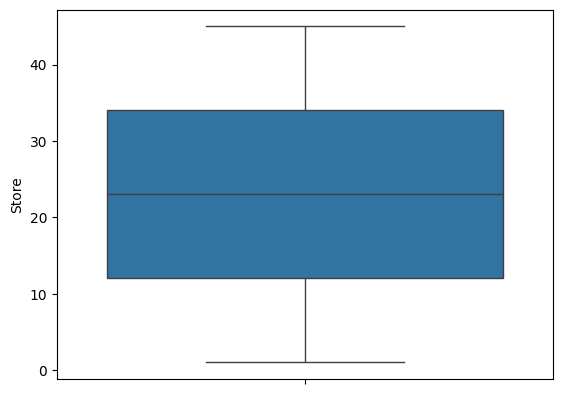

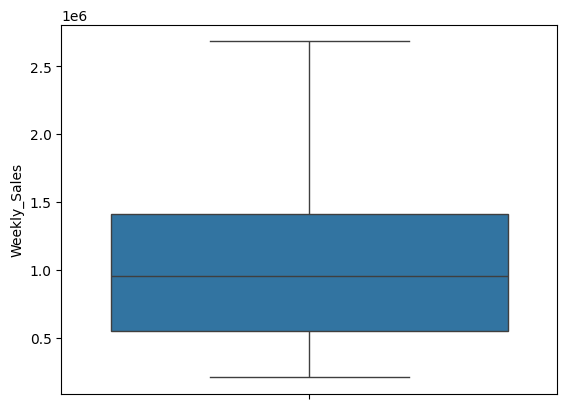

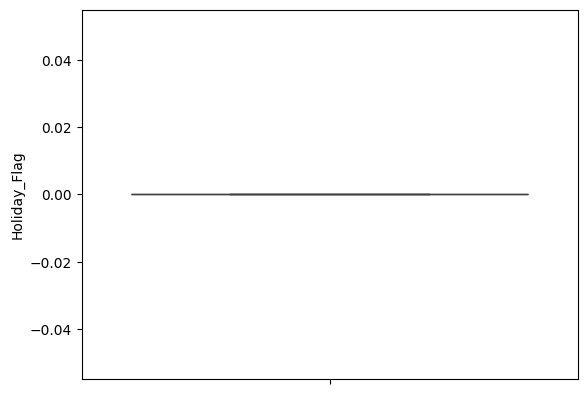

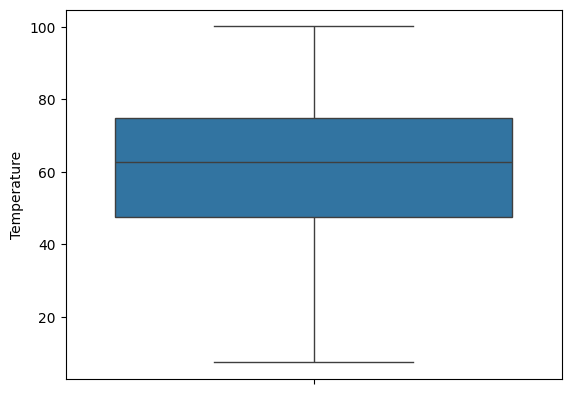

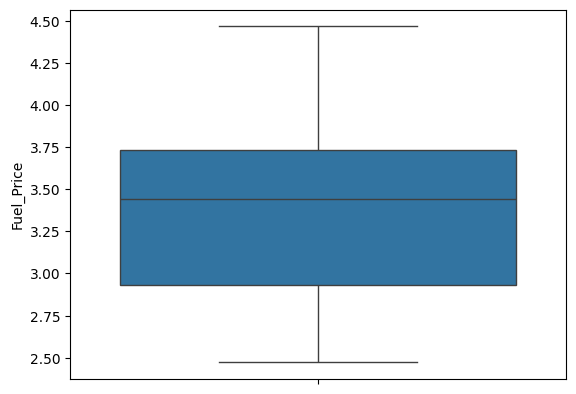

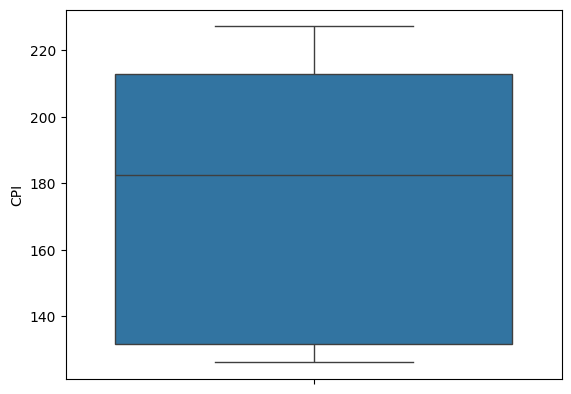

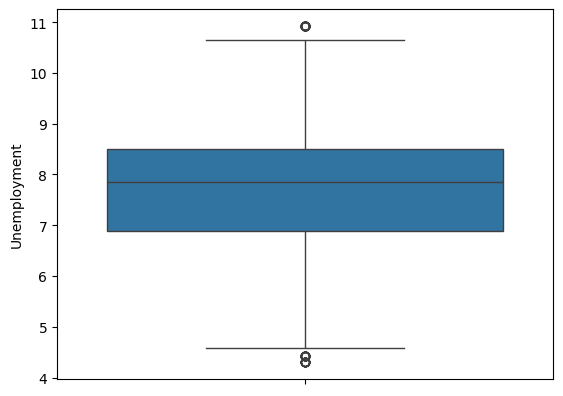

In [61]:
for col in data.columns:
    if data[col].dtypes != 'object' :
        sns.boxplot(data[col])
        plt.show()

In [ ]:
# Identify and remove outliers

# df_no_outliers = df[~((df < LL) | (df > UL)).any(axis=1)]


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6401 non-null   float64
 2   Holiday_Flag  5985 non-null   float64
 3   Temperature   6432 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  5954 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 402.2+ KB


In [65]:
data.isnull().sum()

Store             0
Weekly_Sales     34
Holiday_Flag    450
Temperature       3
Fuel_Price        0
CPI               0
Unemployment    481
dtype: int64

In [67]:
# to fill null values using for loop

for col in data.columns :
    
    if data[col].dtypes in ['int64','float64']:
        data[col].fillna(data[col].mean(), inplace = True)

In [69]:
data

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
05-02-2010      1    1643690.90           0.0        42.31       2.572   
12-02-2010      1    1641957.44           0.0        38.51       2.548   
19-02-2010      1    1611968.17           0.0        39.93       2.514   
26-02-2010      1    1409727.59           0.0        46.63       2.561   
05-03-2010      1    1554806.68           0.0        46.50       2.625   
...           ...           ...           ...          ...         ...   
28-09-2012     45     713173.95           0.0        64.88       3.997   
05-10-2012     45     733455.07           0.0        64.89       3.985   
12-10-2012     45     734464.36           0.0        54.47       4.000   
19-10-2012     45     718125.53           0.0        56.47       3.969   
26-10-2012     45     760281.43           0.0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
05-02-2010  211.096358         8.106  
12-02-2010  211.242170         8.106  
19-02-2010  211.289143         8.106  
26-02-2010  211.319643         8.106  
05-03-2010  211.350143         8.106  
...                ...           ...  
28-09-2012  192.013558         8.684  
05-10-2012  192.170412         8.667  
12-10-2012  192.327265         8.667  
19-10-2012  192.330854         8.667  
26-10-2012  192.308899         8.667  

[6435 rows x 7 columns]

In [71]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [73]:
data.duplicated().sum()

0

In [75]:
x = data.drop(columns = ['Weekly_Sales'])
y = data['Weekly_Sales']

In [77]:
x

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  \
Date                                                                   
05-02-2010      1           0.0        42.31       2.572  211.096358   
12-02-2010      1           0.0        38.51       2.548  211.242170   
19-02-2010      1           0.0        39.93       2.514  211.289143   
26-02-2010      1           0.0        46.63       2.561  211.319643   
05-03-2010      1           0.0        46.50       2.625  211.350143   
...           ...           ...          ...         ...         ...   
28-09-2012     45           0.0        64.88       3.997  192.013558   
05-10-2012     45           0.0        64.89       3.985  192.170412   
12-10-2012     45           0.0        54.47       4.000  192.327265   
19-10-2012     45           0.0        56.47       3.969  192.330854   
26-10-2012     45           0.0        58.85       3.882  192.308899   

            Unemployment  
Date                      
05-02-2010         8.106  
12-02-2010         8.106  
19-02-2010         8.106  
26-02-2010         8.106  
05-03-2010         8.106  
...                  ...  
28-09-2012         8.684  
05-10-2012         8.667  
12-10-2012         8.667  
19-10-2012         8.667  
26-10-2012         8.667  

[6435 rows x 6 columns]

In [79]:
x.shape

(6435, 6)

In [61]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [81]:
y.shape

(6435,)

In [ ]:
# standardise data

In [83]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc = StandardScaler()

In [87]:
x_scaled = sc.fit_transform(x)

In [89]:
x_scaled[:5]

array([[-1.69397911,  0.        , -0.99885845, -1.71379998,  1.00417522,
         0.32250859],
       [-1.69397911,  0.        , -1.20536253, -1.76608938,  1.00788038,
         0.32250859],
       [-1.69397911,  0.        , -1.12819522, -1.84016603,  1.009074  ,
         0.32250859],
       [-1.69397911,  0.        , -0.76409592, -1.73776595,  1.00984902,
         0.32250859],
       [-1.69397911,  0.        , -0.77116054, -1.59832755,  1.01062404,
         0.32250859]])

In [ ]:
# spliting data for training and validation

In [91]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 38 )

In [ ]:
# to build linar regression model

In [95]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()

In [99]:
lr_model = lr.fit(x_train, y_train)

In [101]:
lr_model

LinearRegression()

In [103]:
lr_pred = lr_model.predict(x_test)

In [105]:
lr_pred

array([672421.89244052, 809513.74189276, 968796.87273288, ...,
       844114.05028467, 966191.59562359, 701932.2769683 ])

In [147]:
lr_pred.dtype

dtype('float64')

In [107]:
# Set print options for decimal formatting with specific precision

np.set_printoptions(precision=2, suppress=True)

# Print the array
print(lr_pred)


[672421.89 809513.74 968796.87 ... 844114.05 966191.6  701932.28]


In [109]:
y_test

Date
25-11-2011     669965.22
16-07-2010     438068.71
11-03-2011     599828.39
09-07-2010    1665502.55
21-10-2011     505068.22
                 ...    
16-07-2010     633203.69
18-05-2012    1932233.17
28-05-2010    1205662.85
04-03-2011     963910.81
31-08-2012    1360517.52
Name: Weekly_Sales, Length: 1287, dtype: float64

In [ ]:
# model validation

In [113]:
from sklearn.metrics import *

In [115]:
r2 = r2_score(lr_pred, y_test)
r2

-5.842335771045039

In [117]:
mse = mean_squared_error(lr_pred, y_test)
mse

260694702907.40094

In [121]:
rmse = np.sqrt(mse)
rmse

510582.7091739407

In [123]:
print(f'r2 score is:{r2}')
print(f'mse is : {mse}')
print(f'rmse is : {rmse}')

r2 score is:-5.842335771045039
mse is : 260694702907.40094
rmse is : 510582.7091739407


In [ ]:
# calculate error

In [125]:
error = y_test- lr_pred

In [127]:
error

Date
25-11-2011     -2456.672441
16-07-2010   -371445.031893
11-03-2011   -368968.482733
09-07-2010    609189.817288
21-10-2011   -517507.124264
                  ...      
16-07-2010   -566314.522212
18-05-2012    777254.005019
28-05-2010    361548.799715
04-03-2011     -2280.785624
31-08-2012    658585.243032
Name: Weekly_Sales, Length: 1287, dtype: float64

In [129]:
error_df =pd.DataFrame({'y_test' : y_test,
                         'lr_pred' : lr_pred,
                         'error' : error})
error_df

y_test       lr_pred          error
Date                                               
25-11-2011   669965.22  6.724219e+05   -2456.672441
16-07-2010   438068.71  8.095137e+05 -371445.031893
11-03-2011   599828.39  9.687969e+05 -368968.482733
09-07-2010  1665502.55  1.056313e+06  609189.817288
21-10-2011   505068.22  1.022575e+06 -517507.124264
...                ...           ...            ...
16-07-2010   633203.69  1.199518e+06 -566314.522212
18-05-2012  1932233.17  1.154979e+06  777254.005019
28-05-2010  1205662.85  8.441141e+05  361548.799715
04-03-2011   963910.81  9.661916e+05   -2280.785624
31-08-2012  1360517.52  7.019323e+05  658585.243032

[1287 rows x 3 columns]

In [ ]:
# to bulid random forest regressor

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
rf =  RandomForestRegressor(n_estimators = 50, random_state = 38)

In [135]:
rf_model = rf.fit(x_train, y_train)

In [137]:
rf_model

RandomForestRegressor(n_estimators=50, random_state=38)

In [139]:
rf_pred = rf_model.predict(x_test)

In [141]:
rf_pred

array([ 614287.92,  440970.89,  673184.22, ..., 1143736.52, 1013403.42,
       1448334.71])

In [143]:
rf_error = y_test - rf_pred
rf_error

Date
25-11-2011     55677.297600
16-07-2010     -2902.177800
11-03-2011    -73355.828400
09-07-2010    209955.410000
21-10-2011    -20533.115600
                  ...      
16-07-2010     10398.906600
18-05-2012    -58949.106071
28-05-2010     61926.332000
04-03-2011    -49492.605000
31-08-2012    -87817.185200
Name: Weekly_Sales, Length: 1287, dtype: float64

In [145]:
rf_r2 = r2_score(y_test,rf_pred)
rf_r2

0.916644601696812

In [147]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mse

24963253813.838448

In [149]:
rf_rmse = np.sqrt(rf_mse)
rf_rmse

157997.63863374176

In [151]:
print(f'r2 score is:{rf_r2}')
print(f'mse is : {rf_mse}')
print(f'rmse is : {rf_rmse}')

r2 score is:0.916644601696812
mse is : 24963253813.838448
rmse is : 157997.63863374176


In [ ]:
# section 1 extension

In [ ]:
a.  If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

b.  If the weekly sales show a seasonal trend, when and what could be the reason?

c.   Does temperature affect the weekly sales in any manner?

d.  How is the Consumer Price index affecting the weekly sales of various stores?

e.  Top performing stores according to the historical data.
    
f.   The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [153]:
corr = data['Weekly_Sales'].corr(data['Unemployment'])
corr

# weekly sales has -ve correlation with unemployment mean high unemployment low weekly sales

-0.07110528707288298

In [155]:
x1 = data[['Unemployment']]
y = data['Weekly_Sales']

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.20, random_state = 38)

In [159]:
model = LinearRegression()

In [161]:
lr_model = model.fit(x_train,y_train)

In [163]:
model_pred = model.predict(x_test)


In [165]:
model_error = y_test - model_pred
model_error

Date
25-11-2011   -279259.182656
16-07-2010   -582252.781098
11-03-2011   -446725.116160
09-07-2010    645805.630689
21-10-2011   -471602.642859
                  ...      
16-07-2010   -387117.801098
18-05-2012    928150.545369
28-05-2010    215320.804688
04-03-2011     23361.015500
31-08-2012    282353.741722
Name: Weekly_Sales, Length: 1287, dtype: float64

In [225]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [167]:
data['predicted_sales'] = model.predict(x1)

In [169]:
data['error'] = y - data['predicted_sales']

In [171]:
# Identify stores with the highest negative errors (indicating they are suffering the most)

most_affected_stores = data[data['error'] < 0]

In [173]:
most_affected_stores[['Store','error']]

Store          error
Date                            
23-12-2011      2   -7022.706226
05-02-2010      3 -584063.825344
12-02-2010      3 -624957.085344
19-02-2010      3 -624043.855344
26-02-2010      3 -638481.185344
...           ...            ...
28-09-2012     45 -286848.958014
05-10-2012     45 -267157.711369
12-10-2012     45 -266148.421369
19-10-2012     45 -282487.251369
26-10-2012     45 -240331.351369

[3478 rows x 2 columns]

In [239]:
most_affected_stores['Store'].nunique()

35

In [241]:
most_affected_stores['Store'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 12, 13, 15, 16, 17, 18, 20, 21, 22,
       23, 25, 26, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44,
       45], dtype=int64)

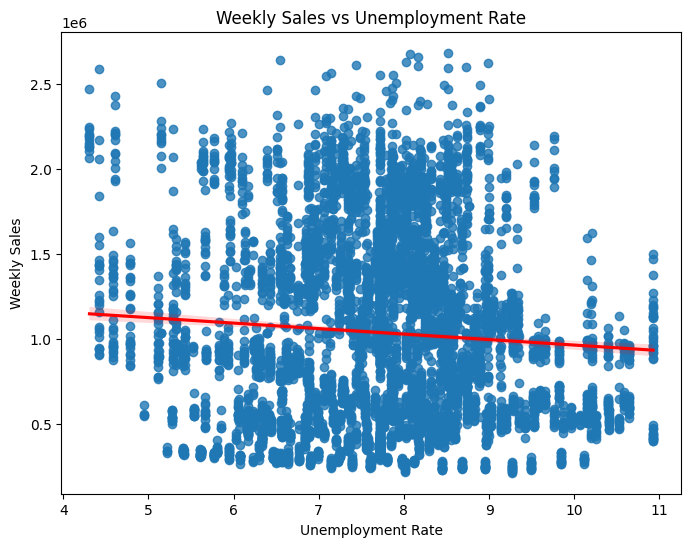

In [243]:
# Visualize the relationship between Weekly Sales and Unemployment

plt.figure(figsize=(8, 6))
sns.regplot(x='Unemployment', y='Weekly_Sales', data=data, line_kws={"color": "red"})
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Unemployment Rate')
plt.show()

In [ ]:
In above chart, red line clearly shows little down trend as unemployment increase weekly sales decline.

In [ ]:
1c.Does temperature affect the weekly sales in any manner ?

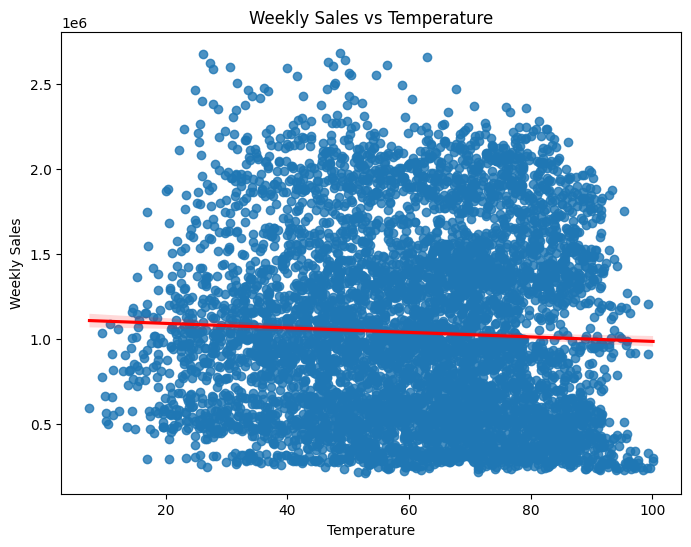

In [201]:
# Visualize the relationship between Weekly Sales and Temperature

plt.figure(figsize=(8, 6))
sns.regplot(x='Temperature', y='Weekly_Sales', data=data, line_kws={"color": "red"})
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Temperature')
plt.show()

In [ ]:
In above chart, red line clearly shows little down trend as Tempreture increase weekly sales slightly decline.

In [175]:
data.drop(columns=['predicted_sales','error'],inplace = True)

In [177]:
data.head(2)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
05-02-2010      1    1643690.90           0.0        42.31       2.572   
12-02-2010      1    1641957.44           0.0        38.51       2.548   

                   CPI  Unemployment  
Date                                  
05-02-2010  211.096358         8.106  
12-02-2010  211.242170         8.106

In [203]:
x2 = data[['CPI']]
y = data['Weekly_Sales']

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.20, random_state = 38)

In [207]:
model = LinearRegression()

In [209]:
lr_model = model.fit(x_train, y_train)

In [211]:
data['predicted_sales'] = model.predict(x2)

In [213]:
data['error'] = y - data['predicted_sales']

In [215]:
most_affected_stores2 = data[data['error'] < 0]

In [217]:
most_affected_stores2[['Store','error']]

Store          error
Date                            
05-02-2010      3 -536211.086778
12-02-2010      3 -576978.197336
19-02-2010      3 -576027.019774
26-02-2010      3 -590441.102608
05-03-2010      3 -582420.675443
...           ...            ...
28-09-2012     45 -303518.461579
05-10-2012     45 -283105.349273
12-10-2012     45 -281964.066884
19-10-2012     45 -298299.876913
26-10-2012     45 -256162.452274

[3617 rows x 2 columns]

In [219]:
most_affected_stores2['Store'].nunique()

35

In [197]:
most_affected_stores2['Store'].unique()

array([ 3,  4,  5,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18, 21, 22, 23, 24,
       25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44,
       45], dtype=int64)

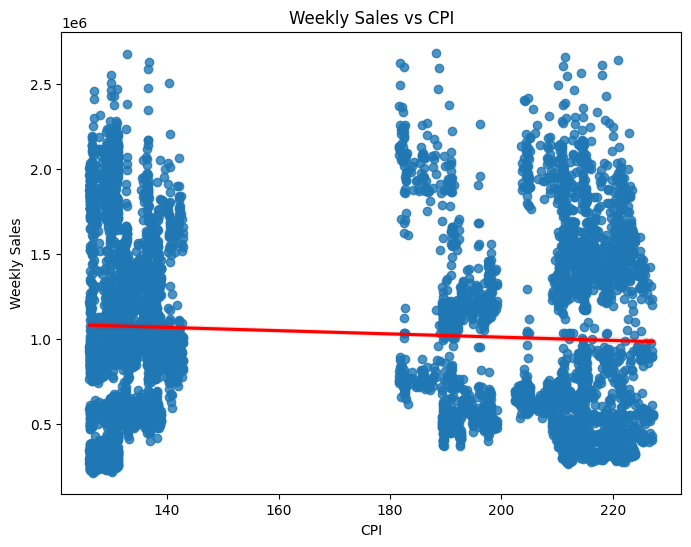

In [199]:
# Visualize the relationship between Weekly Sales and cpi

plt.figure(figsize=(8, 6))
sns.regplot(x='CPI', y='Weekly_Sales', data=data, line_kws={"color": "red"})
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs CPI')
plt.show()

In [ ]:
In above chart, red line clearly shows little down trend as CPI increase weekly sales slightly decline.

In [221]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'predicted_sales', 'error'],
      dtype='object')

In [223]:
x3 = data[['Store']]
y = data['Weekly_Sales']

In [225]:
x_train,x_test, y_train, y_test = train_test_split(x3, y , test_size = 0.20, random_state = 38)

In [227]:
model = LinearRegression()

In [229]:
model.fit(x_train, y_train)

LinearRegression()

In [231]:
data['predicted_sales'] = model.predict(x3)

pd.set_option('display.float_format', '{:.2f}'.format)

In [233]:
data['error'] = y- data['predicted_sales']

In [235]:
top_stores = data[data['error'] > 0]

In [237]:
top_stores

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
Date                                                                            
05-02-2010      1    1643690.90          0.00        42.31        2.57 211.10   
12-02-2010      1    1641957.44          0.00        38.51        2.55 211.24   
19-02-2010      1    1611968.17          0.00        39.93        2.51 211.29   
26-02-2010      1    1409727.59          0.00        46.63        2.56 211.32   
05-03-2010      1    1554806.68          0.00        46.50        2.62 211.35   
...           ...           ...           ...          ...         ...    ...   
31-08-2012     45     734297.87          0.00        75.09        3.87 191.46   
07-09-2012     45     766512.66          0.00        75.70        3.91 191.58   
05-10-2012     45     733455.07          0.00        64.89        3.98 192.17   
12-10-2012     45     734464.36          0.00        54.47        4.00 192.33   
26-10-2012     45     760281.43          0.00        58.85        3.88 192.31   

            Unemployment  predicted_sales     error  
Date                                                 
05-02-2010          8.11       1339469.04 304221.86  
12-02-2010          8.11       1339469.04 302488.40  
19-02-2010          8.11       1339469.04 272499.13  
26-02-2010          8.11       1339469.04  70258.55  
05-03-2010          8.11       1339469.04 215337.64  
...                  ...              ...       ...  
31-08-2012          8.68        726140.98   8156.89  
07-09-2012          8.68        726140.98  40371.68  
05-10-2012          8.67        726140.98   7314.09  
12-10-2012          8.67        726140.98   8323.38  
26-10-2012          8.67        726140.98  34140.45  

[3154 rows x 9 columns]

In [239]:
top_stores['Store'].unique()

array([ 1,  2,  4,  6,  8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45],
      dtype=int64)

In [241]:
top_stores['Store'].nunique()

32

In [ ]:
# Visualize weekly sale and store

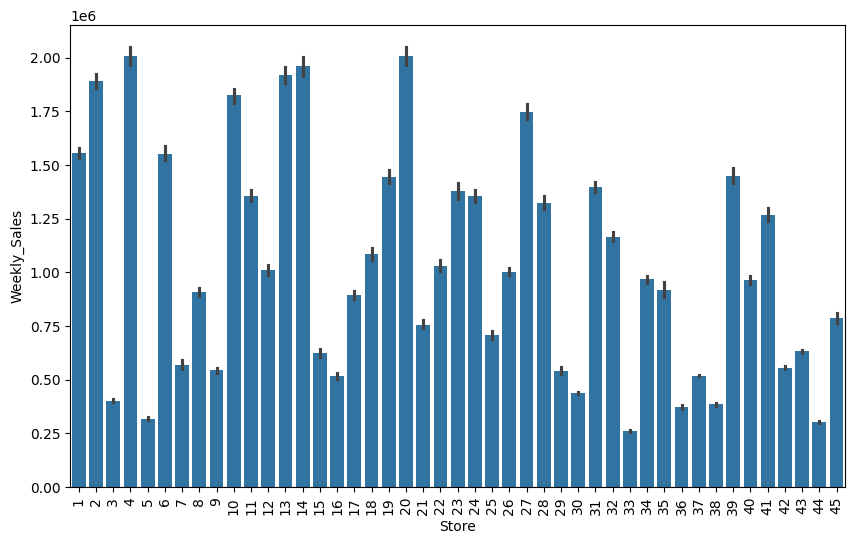

In [243]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Store', y = 'Weekly_Sales', data = data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
1f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [129]:
data.groupby('Store')['Weekly_Sales'].sum()

Store
1     2.224028e+08
2     2.707943e+08
3     5.758674e+07
4     2.872520e+08
5     4.547569e+07
6     2.220647e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.608595e+08
11    1.939628e+08
12    1.442872e+08
13    2.744193e+08
14    2.802721e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    2.872766e+08
21    1.081179e+08
22    1.470756e+08
23    1.970525e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.501110e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

In [245]:
# calculate total sales per store

store_performance = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# to get original scale values / weekly sales values

pd.set_option('display.float_format', '{:.2f}'.format)


In [247]:
store_performance

Store  Weekly_Sales
0       1  222402808.85
1       2  270794324.21
2       3   57586735.07
3       4  287252007.04
4       5   45475688.90
5       6  222064685.81
6       7   81598275.14
7       8  129951181.13
8       9   77789218.99
9      10  260859529.21
10     11  193962786.80
11     12  144287230.15
12     13  274419252.51
13     14  280272106.19
14     15   89133683.92
15     16   74252425.40
16     17  127782138.83
17     18  155114734.21
18     19  206634862.10
19     20  287276647.28
20     21  108117878.92
21     22  147075648.57
22     23  197052471.10
23     24  194016021.28
24     25  101061179.17
25     26  143416393.79
26     27  250110995.76
27     28  189263680.58
28     29   77141554.31
29     30   62716885.12
30     31  199613905.50
31     32  166819246.16
32     33   37160221.96
33     34  138249763.00
34     35  131520672.08
35     36   53412214.97
36     37   74202740.32
37     38   55159626.42
38     39  207445542.47
39     40  137870309.79
40     41  181341934.89
41     42   79565752.43
42     43   90565435.41
43     44   43293087.84
44     45  112395341.42

In [249]:
# Identify the highest and lowest performing stores

max_store = store_performance.loc[store_performance['Weekly_Sales'].idxmax()]

min_store = store_performance.loc[store_performance['Weekly_Sales'].idxmin()]

In [251]:
# Calculate the difference between highest and lowest performing store

difference = max_store['Weekly_Sales'] - min_store['Weekly_Sales']

In [253]:
print("Highest Performing Store:")
print(max_store)

Highest Performing Store:
Store                 20.00
Weekly_Sales   287276647.28
Name: 19, dtype: float64


In [255]:
print("Lowest Performing Store:")
print(min_store)

Lowest Performing Store:
Store                33.00
Weekly_Sales   37160221.96
Name: 32, dtype: float64


In [257]:
print(f"Difference in Performance: {difference}")

Difference in Performance: 250116425.32475862


In [259]:
print("Highest Performing Store:")
print(max_store)
print("\nLowest Performing Store:")
print(min_store)
print(f"\nDifference in Performance: {difference}")


Highest Performing Store:
Store                 20.00
Weekly_Sales   287276647.28
Name: 19, dtype: float64

Lowest Performing Store:
Store                33.00
Weekly_Sales   37160221.96
Name: 32, dtype: float64

Difference in Performance: 250116425.32475862


In [ ]:
Inference(s) :

Highet performing store no. 20 which total sales is 28,72,76,647.28

Worst performing store no. 33 which total sales is 37160221.96

and the difference is 25,01,16,425.32 which is quite high.

In [ ]:
1b.  If the weekly sales show a seasonal trend, when and what could be the reason?

<Axes: xlabel='Date'>

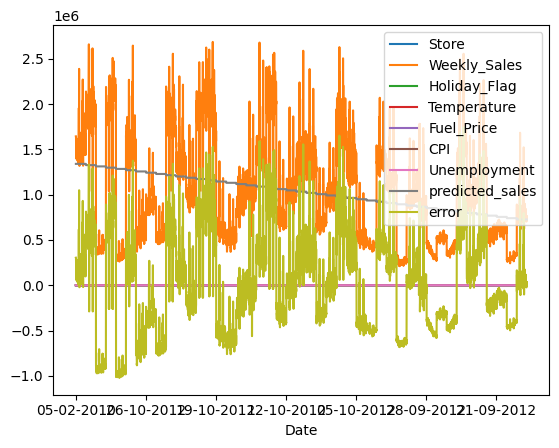

In [261]:
data.plot()